In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime  
from datetime import timedelta  

In [2]:
# Load Tensor
with open('../pkl/COVID_sorted_W_tensors.pkl', 'rb') as f:
    travel_data = pickle.load(f)

In [3]:
week_slices = pd.date_range('2020-01-20', periods=22, freq='W')
xaxis = week_slices[1:]

In [4]:
df = pd.read_csv("PatientInfo.csv")
df['confirmed_date'] = pd.to_datetime(df['confirmed_date'])
df = df[df['province'].isin(["Seoul", "Gyeonggi-do", "Incheon"])]

In [5]:
confdate = df['confirmed_date']
# confdate.groupby().count()

In [6]:
datecount = []

In [7]:
for x in xaxis:
    cnt=0
    for date in confdate:
        if((date<x) & (date> x-timedelta(days=7))):
            cnt=cnt+1
    datecount.append(cnt)
datecount = np.array(datecount)

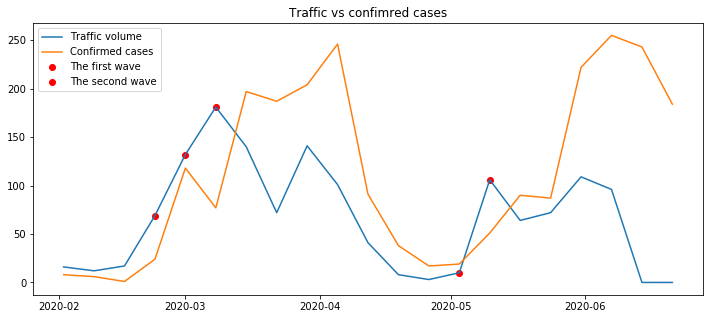

In [8]:
# travel_data.shape
tensors = travel_data[:,:,:54]
traffic = np.sum(np.sum(tensors, 2),1) # total traffic
# outtraffic = np.sum(np.sum(tensors, 1),1)
# traffic = intraffic +outtraffic

plt.figure(figsize=(12,5))
plt.plot(xaxis, traffic, label= 'Traffic volume')
plt.plot(xaxis, datecount, label = 'Confirmed cases')
plt.scatter(xaxis[3:6], traffic[3:6], color='red', label = 'The first wave')
plt.scatter(xaxis[-8:-6], traffic[-8:-6], color='red', label = 'The second wave')
plt.title("Traffic vs confimred cases")
plt.legend()

In [9]:
np.corrcoef([traffic[:-1], datecount[1:]])

array([[1.        , 0.63623258],
       [0.63623258, 1.        ]])

In [10]:
with open('../pkl/COVID_label_dict.pkl', 'rb') as f:
    label_dict = pickle.load(f)

In [11]:
time = -7
for i in range(54):
    node = i
    intraffic = np.sum(tensors[time,:,node])- np.sum(tensors[time-1,:,node]) #in-traffic
    outtraffic = np.sum(tensors[time,node,:])- np.sum(tensors[time-1,node,:]) #out-traffic
#     if(intraffic >0):
#         print(i,label_dict[node],outtraffic)
#         print(i,label_dict[node],intraffic+outtraffic)

In [12]:
time = 5
for i in range(54):
    node = i
    outtraffic = np.sum(tensors[time,node,:])- np.sum(tensors[time-1,node,:]) #out-traffic
    if(outtraffic >4):
        print(i,label_dict[node],outtraffic)

2 Yangcheon-gu 5.0
3 Guro-gu 33.0
8 Gangseo-gu 7.0
14 Gwanak-gu 6.0
16 Seodaemun-gu 9.0
20 Mapo-gu 8.0


In [13]:
pop = pd.read_csv("./SeoulFloating.csv")
pop.date=pd.to_datetime(pop.date)

In [14]:
monday = pd.date_range('2020-01-20', periods=22, freq='7D')
tueday = pd.date_range('2020-01-21', periods=22, freq='7D')
wedday = pd.date_range('2020-01-22', periods=22, freq='7D')
thuday = pd.date_range('2020-01-23', periods=22, freq='7D')
friday = pd.date_range('2020-01-24', periods=22, freq='7D')
satday = pd.date_range('2020-01-25', periods=22, freq='7D')
sunday = pd.date_range('2020-01-26', periods=21, freq='7D')

In [15]:
day_list = [monday,tueday, wedday, friday,satday,sunday] 

In [16]:
sunday

DatetimeIndex(['2020-01-26', '2020-02-02', '2020-02-09', '2020-02-16',
               '2020-02-23', '2020-03-01', '2020-03-08', '2020-03-15',
               '2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12',
               '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10',
               '2020-05-17', '2020-05-24', '2020-05-31', '2020-06-07',
               '2020-06-14'],
              dtype='datetime64[ns]', freq='7D')

In [17]:
# fp_list = []
# for d in sunday:
#     condition = (pop['date']<d) & (pop['date'] > d - timedelta(days=7))
#     filtered_pop = pop[condition]
#     fp_list.append(filtered_pop['fp_num'].sum())
# #     if((date<x) & (date> x-timedelta(days=7))):

In [18]:
satpop = pop[pop['date'].isin(satday)][['date','city','fp_num']]
satpop = satpop.groupby(['date','city'])['fp_num'].sum().reset_index()
sunpop = pop[pop['date'].isin(sunday)][['date','city','fp_num']]
sunpop = sunpop.groupby(['date','city'])['fp_num'].sum().reset_index()

In [19]:
week_pop = sunpop
for d in day_list[:-1]:
    temp = pop[pop['date'].isin(d)][['date','city','fp_num']]
    temp = temp.groupby(['date','city'])['fp_num'].sum().reset_index()
    week_pop['fp_num'] += temp['fp_num']
#     print(np.sum((week_pop['city']==temp['city'])))

In [20]:
sunpop

,date,city,fp_num
0,2020-01-26,Dobong-gu,35198430
1,2020-01-26,Dongdaemun-gu,39746750
2,2020-01-26,Dongjag-gu,42912480
3,2020-01-26,Eunpyeong-gu,47972760
4,2020-01-26,Gangbuk-gu,34591000
...,...,...,...
470,2020-05-31,Seongdong-gu,34867530
471,2020-05-31,Songpa-gu,70684800
472,2020-05-31,Yangcheon-gu,44322450
473,2020-05-31,Yeongdeungpo-gu,53603980


In [21]:
node_float_temp = week_pop
# node_float['fp_num'] = satpop['fp_num'] + sunpop['fp_num']
node_float_temp.date = pd.to_datetime(node_float_temp.date)
node_float_temp = week_pop[week_pop['city']=='Guro-gu']

In [22]:
# def node_float_pop(nodename):
#     node_pop = pop[pop['city']==nodename]
#     fp_list = []
#     for d in sunday:
#         condition = (node_pop['date']<d) & (node_pop['date'] > d - timedelta(days=7))
#         filtered_pop = node_pop[condition]
#         fpsum = filtered_pop['fp_num'].sum()
#         if(fpsum>0):
#             fp_list.append(fpsum)
#         else:
#             fp_list.append(fp_list[-1])
#     return np.array(fp_list)

In [23]:
def node_float_pop(nodename):
    node_float_temp = week_pop
    # node_float['fp_num'] = satpop['fp_num'] + sunpop['fp_num']
    node_float_temp.date = pd.to_datetime(node_float_temp.date)
    node_float_temp = week_pop[week_pop['city']==nodename]
    return node_float_temp

In [39]:
node_float_pop('Geumcheon-gu')

,date,city,fp_num
8,2020-01-26,Geumcheon-gu,31396040
33,2020-02-02,Geumcheon-gu,32109850
58,2020-02-09,Geumcheon-gu,32848940
83,2020-02-16,Geumcheon-gu,32841820
108,2020-02-23,Geumcheon-gu,37331570
133,2020-03-01,Geumcheon-gu,32902970
158,2020-03-08,Geumcheon-gu,32751950
183,2020-03-15,Geumcheon-gu,31217800
208,2020-03-22,Geumcheon-gu,32218000
233,2020-03-29,Geumcheon-gu,32347350


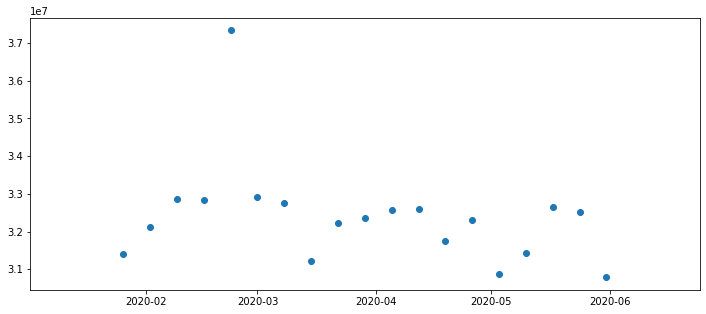

In [26]:
node_float = node_float_pop('Geumcheon-gu')
plt.figure(figsize=(12,5))
plt.scatter(sunday[:-2], node_float['fp_num'])

In [27]:
def node_confirmed_case(node_name):
    node_confdate = df[df['city']==node_name]['confirmed_date']
    datecount = []
    for x in xaxis:
        cnt=0
        for date in node_confdate:
            if((date<x) & (date> x-timedelta(days=7))):
                cnt=cnt+1
        datecount.append(cnt)
    datecount = np.array(datecount)
    return datecount

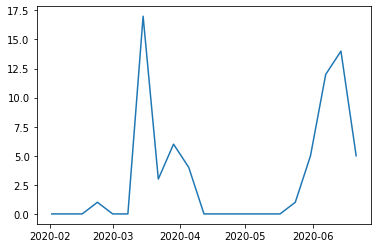

In [28]:
plt.plot(xaxis, node_confirmed_case('Guro-gu'))

In [29]:
with open('../pkl/COVID_sorted_W_tensors.pkl', 'rb') as f:
    travel_data = pickle.load(f) 

In [30]:
tensors = travel_data[:,:54,:54]
tensors.shape

(21, 54, 54)

In [31]:
def node_patient_traffic(node_num):
    cnt_num = node_num
    intraffic = np.sum(tensors[:,:,cnt_num], 1) #in-traffic
    outtraffic = np.sum(tensors[:,cnt_num,:], 1) #outtraffic
    return intraffic + outtraffic

In [32]:
node_float_pop('Guro-gu')['fp_num'].shape

(19,)

In [33]:
node_patient_traffic(3)[:-3].shape

(18,)

In [34]:
node_confirmed_case('Guro-gu')[:-3]

array([ 0,  0,  0,  1,  0,  0, 17,  3,  6,  4,  0,  0,  0,  0,  0,  0,  1,
        5])

[[1.         0.90137439]
 [0.90137439 1.        ]]
[[1.         0.91554057]
 [0.91554057 1.        ]]


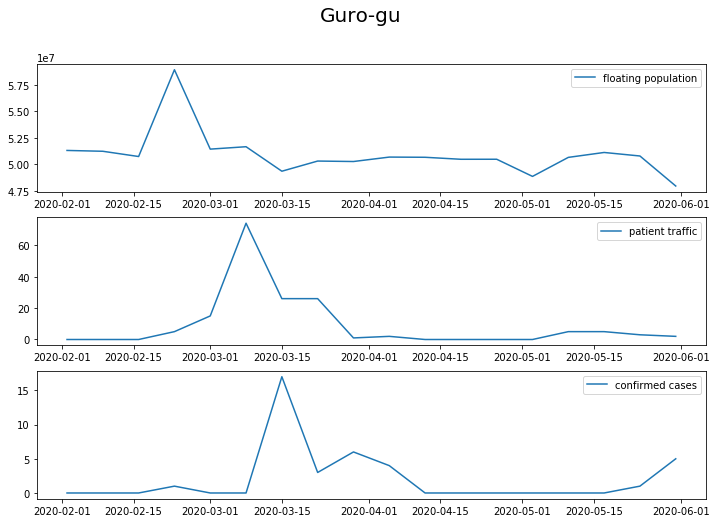

In [35]:
fig, axs = plt.subplots(3,figsize=(12,8))
nodenum = 3
nodename = label_dict[nodenum]
fig.suptitle(nodename, fontsize=20)

flopop = node_float_pop(nodename)['fp_num'][1:]
pait = node_patient_traffic(3)[:-3]
conf = node_confirmed_case(nodename)[:-3]

axs[0].plot(xaxis[:-3], flopop, label = 'floating population')
axs[1].plot(xaxis[:-3], pait, label = 'patient traffic')
axs[2].plot(xaxis[:-3], conf, label = 'confirmed cases')
axs[0].legend()
axs[1].legend()
axs[2].legend()

print(np.corrcoef([pait[1:-1], conf[2:]]))
print(np.corrcoef([flopop[:-3], pait[2:-1]]))

In [36]:
[flopop[:-2], pait[1:-1]]

[34     51319390
 59     51241180
 84     50747640
 109    58911900
 134    51443200
 159    51669380
 184    49365110
 209    50321080
 234    50277390
 259    50694370
 284    50675840
 309    50488160
 334    50490600
 359    48877000
 384    50666960
 409    51128670
 Name: fp_num, dtype: int64,
 array([ 0.,  0.,  5., 15., 74., 26., 26.,  1.,  2.,  0.,  0.,  0.,  0.,
         5.,  5.,  3.])]

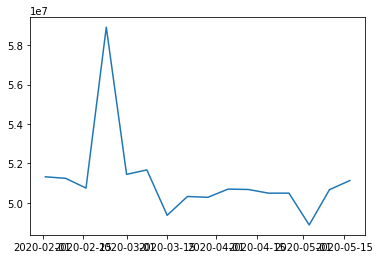

In [37]:
plt.plot(xaxis[:-3][:-2], flopop[:-2])


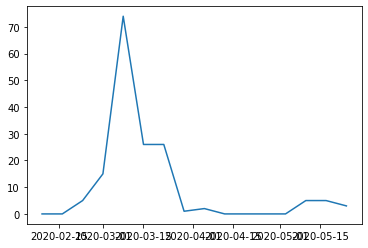

In [38]:
plt.plot(xaxis[:-3][1:-1], pait[1:-1])

In [ ]:
granger_df = pd.DataFrame([xaxis[:-3], np.array(flopop), pait, conf]).T
granger_df.columns = ['date','flopop','patient','confirmation']
granger_df = granger_df.set_index('date')

In [ ]:
# n_obs=1
dataset = granger_df
# X_train, X_test = dataset[0:-n_obs], dataset[-n_obs:]
X_train = dataset
print(X_train.shape, X_test.shape)

In [ ]:
transform_data = X_train.diff().dropna()
transform_data['patient'] = dataset['patient']
transform_data

In [ ]:
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
augmented_dickey_fuller_statistics(dataset['flopop'])

In [ ]:
transform_data.columns

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    d = transform_data[transform_data.columns[i]]
    ax.plot(d, color='red', linewidth=1)
# Decorations
ax.set_title(dataset.columns[i])
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.spines['top'].set_alpha(0)
ax.tick_params(labelsize=6)
plt.tight_layout();